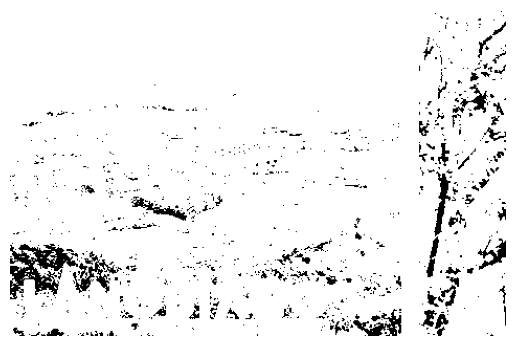

In [ ]:
# Bài 1
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

img = Image.open('./img/dalat.jpg').convert('L')

x_start, y_start = 21 + 100, 25
x_end, y_end = 495 + 100, 337

cropped = img.crop((x_start, y_start, x_end, y_end))
cropped_np = np.array(cropped)

thresh = threshold_otsu(cropped_np)
binary = cropped_np > thresh

binary_03 = (cropped_np / 255.0) > 0.3 
result_np = binary_03     

result_img = Image.fromarray((result_np * 255).astype(np.uint8))
result_img.save('lang_biang.jpg')

plt.imshow(result_img, cmap='gray')
plt.axis('off')
plt.show()


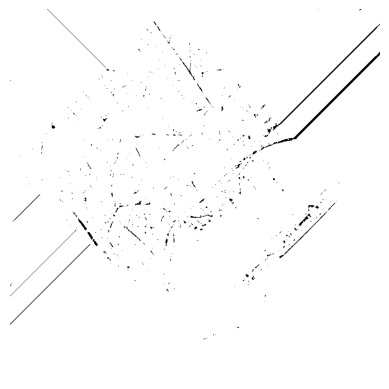

In [ ]:
# Bài 2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_local
from scipy.ndimage import rotate

img = Image.open('./img/dalat.jpg').convert('L')

x_start, y_start = 512, 24
x_end, y_end = 986, 676
cropped = img.crop((x_start, y_start, x_end, y_end))

cropped_np = np.array(cropped)
rotated = rotate(cropped_np, angle=45, reshape=True, mode='nearest')

adaptive_thresh = threshold_local(rotated, block_size=39, offset=60)
binary_img = rotated > adaptive_thresh

result_img = Image.fromarray((binary_img * 255).astype(np.uint8))
result_img.save('ho_xuan_huong.jpg')

plt.imshow(binary_img, cmap='gray')
plt.axis('off')
plt.show()


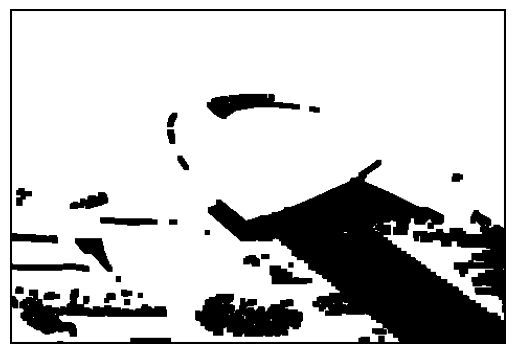

In [ ]:
# Bài 3
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_closing
from scipy.ndimage import map_coordinates


img = Image.open('./img/dalat.jpg').convert('L')

x_start, y_start = 1005, 23
x_end, y_end = 1479, 343
cropped = img.crop((x_start, y_start, x_end, y_end))

cropped_np = np.array(cropped)

coords = np.indices(cropped_np.shape)
mapped = map_coordinates(cropped_np, [coords[0], coords[1]], order=1)

binary = mapped > 100
closed = binary_closing(binary, structure=np.ones((5, 5)))

result_img = Image.fromarray((closed * 255).astype(np.uint8))
result_img.save('quan_truong_lam_vien.jpg')

plt.imshow(result_img, cmap='gray')
plt.axis('off')
plt.show()


In [ ]:
# Bài 4
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate, shift, zoom, binary_dilation, binary_erosion
from skimage.filters import threshold_local, threshold_otsu
from scipy.ndimage import map_coordinates
import ipywidgets as widgets
from IPython.display import display

img = Image.open('./img/dalat.jpg').convert('L')
img_np = np.array(img)
geo_ops = ['None', 'coordinate_mapping', 'Rotate', 'Scale', 'Shift']
seg_ops = ['None', 'Adaptive_thresholding', 'Binary_dilation', 'Binary_erosion', 'Otsu']

geo_dropdown = widgets.Dropdown(options=geo_ops, description='Geometric:')
seg_dropdown = widgets.Dropdown(options=seg_ops, description='Segment:')

display(geo_dropdown, seg_dropdown)
def process_image(geo_choice, seg_choice):
    result = img_np.copy()

    if geo_choice == 'Rotate':
        result = rotate(result, angle=45, reshape=True)
    elif geo_choice == 'Scale':
        result = zoom(result, zoom=1.2)
    elif geo_choice == 'Shift':
        result = shift(result, shift=(20, 30))
    elif geo_choice == 'coordinate_mapping':
        coords = np.indices(result.shape)
        result = map_coordinates(result, [coords[0], coords[1]], order=1)

    if seg_choice == 'Adaptive_thresholding':
        block_size = 39
        offset = 10
        thres = threshold_local(result, block_size=block_size, offset=offset)
        result = result > thres
    elif seg_choice == 'Binary_dilation':
        result = binary_dilation(result > 100)
    elif seg_choice == 'Binary_erosion':
        result = binary_erosion(result > 100)
    elif seg_choice == 'Otsu':
        thres = threshold_otsu(result)
        result = result > thres

    plt.figure(figsize=(6, 6))
    if result.dtype == bool:
        plt.imshow(result, cmap='gray')
    else:
        plt.imshow(result, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.title(f'{geo_choice} + {seg_choice}')
    plt.show()

button = widgets.Button(description="Run")
output = widgets.Output()

def on_button_clicked(b):
    with output:
        output.clear_output()
        process_image(geo_dropdown.value, seg_dropdown.value)

button.on_click(on_button_clicked)
display(button, output)


Dropdown(description='Geometric:', options=('None', 'coordinate_mapping', 'Rotate', 'Scale', 'Shift'), value='…

Dropdown(description='Segment:', options=('None', 'Adaptive_thresholding', 'Binary_dilation', 'Binary_erosion'…

Button(description='Run', style=ButtonStyle())

Output()